In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import os 

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils 
from keras.preprocessing.image import img_to_array, list_pictures, load_img

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 画像データを配列データへ変換

In [2]:
image_list = []
for picture in list_pictures('C:\\Users\\kei\\Desktop\\data\\train'):
    img = load_img(picture,grayscale=True,target_size=(28,28))
    array =img_to_array(img)  
    image_list.append(array)

In [3]:
os.chdir('C:\\Users\\kei\\Desktop\\data')
label_data = pd.read_table('train_master.tsv')
label_list = label_data['category_id'].values.tolist()

# 各項目で扱う数値の設定，データの分割

In [4]:
batch_size = 128
num_classes = 55
epochs = 12
input_shape = (28,28,1)

x_train,x_valid,y_train,y_valid = train_test_split(image_list,label_list,test_size=0.2,random_state=42)

In [5]:
x_train = np.array(x_train)
x_valid = np.array(x_valid)
y_train = np.array(y_train)
y_valid = np.array(y_valid)

# 画素の正規化

In [6]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')

#輝度値0～255を正規化処理
x_train /= 255
x_valid /= 255

#x_train（画像データ数,画像の列分割数,画像の行分割数,1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'valid samples')

x_train shape: (9596, 28, 28, 1)
9596 train samples
2399 valid samples


# クラスラベルの配列形式の変更

In [7]:
y_train = y_train.astype('int32')
y_valid = y_valid.astype('int32')

#クラスラベルをone hot encoding形式へ変更
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.np_utils.to_categorical(y_valid, num_classes)

one hot encodingのイメージ
http://yusuke-ujitoko.hatenablog.com/entry/2017/03/30/000000

# モデリング

In [8]:
model = Sequential()

#Conv2D　kernel_sizeで畳み込み計算の範囲を指定。フィルターの数はfilter_sizeで指定。
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))

#MaxPool2D　プーリング処理。pool_sizeでプーリングする範囲を指定
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Flatten 2次元の特徴を1次元化。平滑化。
model.add(Flatten())


#入力層-隠れ層　128はユニット数、activationは活性化関数
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


#隠れ層-出力層
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_valid, y_valid))

Train on 9596 samples, validate on 2399 samples
Epoch 1/12
9596/9596 [==============================] - 24s 3ms/step - loss: 4.0098 - acc: 0.0198 - val_loss: 4.0073 - val_acc: 0.0158
Epoch 2/12
9596/9596 [==============================] - 23s 2ms/step - loss: 4.0064 - acc: 0.0199 - val_loss: 4.0077 - val_acc: 0.0171
Epoch 3/12
9596/9596 [==============================] - 23s 2ms/step - loss: 4.0054 - acc: 0.0203 - val_loss: 4.0072 - val_acc: 0.0183
Epoch 4/12
9596/9596 [==============================] - 25s 3ms/step - loss: 4.0044 - acc: 0.0204 - val_loss: 4.0076 - val_acc: 0.0142
Epoch 5/12
9596/9596 [==============================] - 26s 3ms/step - loss: 4.0035 - acc: 0.0199 - val_loss: 4.0082 - val_acc: 0.0121
Epoch 6/12
9596/9596 [==============================] - 23s 2ms/step - loss: 3.9998 - acc: 0.0251 - val_loss: 4.0087 - val_acc: 0.0150
Epoch 7/12
9596/9596 [==============================] - 24s 2ms/step - loss: 3.9945 - acc: 0.0264 - val_loss: 4.0090 - val_acc: 0.0154
Epoch 8

model.compileの各パラメータ　https://keras.io/ja/models/sequential/

# 正答率,損失関数のグラフ化

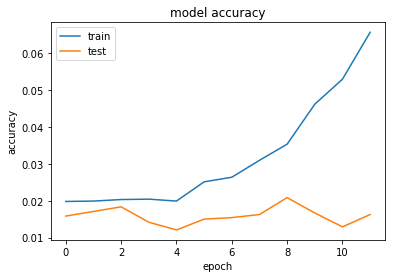

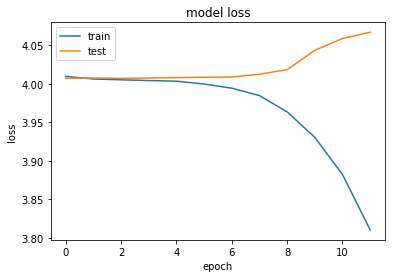

In [9]:
#正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction

In [10]:
x_test = []
for picture in list_pictures('C:\\Users\\kei\\Desktop\\data\\test'):
    img = load_img(picture,grayscale=True,target_size=(28,28))
    array =img_to_array(img)  
    x_test.append(array)

In [11]:
x_test = np.array(x_test)
x_test = x_test.astype('float32')
x_test /= 255
print('x_train shape:', x_test.shape)
print(x_test.shape[0], 'train samples')

x_train shape: (3937, 28, 28, 1)
3937 train samples


In [13]:
pred = model.predict(x_test, batch_size=batch_size, verbose=1, steps=None)
pred = pred.argmax(axis=1)
pred = pd.DataFrame(pred)

3937/3937 [==============================] - 3s 668us/step


In [17]:
os.chdir('C:\\Users\\kei\\Desktop\\data')
sample_label = pd.read_table('sample_submit.tsv', header=None)
test_id = sample_label[0]

In [22]:
submission = pd.concat((test_id,pred), axis = 1)
submission.to_csv("sumission.tsv", index = False, header = None, sep='\t')

# 参考文献

実装①　http://aidiary.hatenablog.com/entry/20161109/1478696865

実装②　https://employment.en-japan.com/engineerhub/entry/2017/04/28/110000

理論①　https://qiita.com/eijian/items/24d7e6aee332d59509ec#_reference-cf6b81cd647475e3c1a3

理論②　http://www.hpc.co.jp/AboutDeepLearning.html